<div style="font-style: italic; text-align: center;" markdown="1">

# Final Project: Wine Quality Prediction

</div>

<br>

<br>

<br>

<br>

<br>

<br>

<img src="https://www.wtso.com/blog/wp-content/uploads/2017/03/HowtoEvaluateQualityWine-CoverImage.jpg" alt="How to Evaluate the Quality of a Wine - From The Vine" width="500" height="600">

<br>

<br>

<br>

<br>

<br>

<br>

<br>

<div style="font-style: italic; text-align: center;" markdown="1">

## Practical Data Science

</div>


<br>

**Prepared by:** Ariadna Rezola, Daniëlle Kotter, Helena Bonnin, Sarah Musetti, & Benja Bohnke**\
Prepared for:** Alberto Santini**\
Program:** Msc in Management, Barcelona School of Management\
**Date:** 25th June 2021

#  Introduction to the data set & project

**Predicting wine quality from its physiochemical characteristics:**

Is there such a thing as a good wine and a bad wine?
Many people think that, excluding particularly bad vinegar-like wines, there isn't much difference between your 15€ and your 60€ bottle.
Blind wine tasting have cast much doubts on the ability of regular people and professional someliers alike to distinguish between wines of different quality.

With this dataset, we will be trying to score wine quality based on objective physical and chemical characteristic of the beverage by the use of Machine Learning (ML) models. Thus, we will predict the quality of wine on the basis of given features. The dataset has the fundamental features which are responsible for affecting the quality of the wine.  Here, we will be dealing with the red type (wine sample from Portugal) wine quality, applying both regresion and classification techniques, testing if it is good or bad. 

**Features that will be used to classify the quality of wine**:

*Input variables (based on physicochemical tests):*

**Fixed acidity:** Also called nonvolatile acids, which include no smell. Almost all acids found in wine are fixed and originate in the grape’s juice. The fixed acids appear in the finished product and stay during fermentation. The most predominant ones are tartaric, malic, and citric. The different wines vary largely in their acid levels.

**Volatile acidity:** a volatile acid evaporates quickly and measures the wine’s acids that are gaseous such as acetic acid. It can give wine an unpleasant taste and smell like vinegar when too high amounts are included (Wine acidity, n.d.).

**Citric acid:** is added in wines to increase the acidity to create specific flavors as it impacts the wine’s taste and smell. It can be tasted as “freshness” (Acids, n.d.).

**Residual sugar:** residual sugar is the sugar that does not convert into alcohol during the wine’s fermentation process (Residual Sugar, 2018). Red wines with a residual sugar level higher than 45 grams/liter are considered sweet (Frazier, n.d.).

**Chlorides:** the concentration of chlorides in wine measures the amount of salt included. It is normally expressed as sodium chloride and it must not contain more than 1000mg/L. Generally, the quality’s wine perception decreases as chlorides increase. 

**Free sulfur dioxide:** it only includes the amount of free SO2 and is based on the pH of the wine. It is used as a preservative of the wine to prevent microbial spoilage and oxidation, 5ppm are needed.
Total sulfur dioxide: short TSO2 is the amount of SO2 that is free plus the portion of bound SO2 to other chemicals (for example sugars) (Sulfur Dioxide, n.d.).

**Density:** is explained by mass or weight per volume and it is determined by the level of alcohol, sugar and other dissolved solids included in the wine. With a higher density normally the quality’s perception level declines. 

**pH:** red wine generally is acidic but pH measures the ripeness of the grapes in relation to acidity in wines. Typically red wines range between 3 and 4, while the most desirable red wine is around 3.3 and 3.6 on the pH scale.

**Sulfites:** used for wines as a food preservative to maintain the flavor and freshness. Red wines typically tend to have less sulfites than clear ones and include around 50mg/l sulfites. Lower acidity goes together with higher amounts of sulfites and vice versa. 

**Alcohol:** the alcohol level contained in wine, measured in percentages (Alcohol Content, n.d.).

*Output variable (based on sensory data):*

**Quality:** the quality of red wine is measured with a score between 0 and 10. It represents our dependent variable.

Each sample was evaluated by a minimum of three sensory assessors (using blind tastes), who graded the wine in a scale that ranges from 0 (very bad) to 10 (excellent). The final sensory score is given by the median of these evaluations. 

## Loading Packages

In [1]:
# Basic packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Model & validation packages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import StandardScaler, PolynomialFeatures # automatically takes into account standardization
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import LeaveOneOut, cross_val_score
from sklearn.model_selection import KFold

## Importing data & exploration

The first step is to do basic data exploration such as checking the descriptions of the data, how it looks like, the size, etc. Below the head of the data set can be found. 

In [3]:
# Loading the data set + displaying head 
redwine = pd.read_csv('winequality-red.csv', sep=";")
redwine.head().round(2)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9       0.08   
1            7.8              0.88         0.00             2.6       0.10   
2            7.8              0.76         0.04             2.3       0.09   
3           11.2              0.28         0.56             1.9       0.08   
4            7.4              0.70         0.00             1.9       0.08   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0      1.0  3.51       0.56   
1                 25.0                  67.0      1.0  3.20       0.68   
2                 15.0                  54.0      1.0  3.26       0.65   
3                 17.0                  60.0      1.0  3.16       0.58   
4                 11.0                  34.0      1.0  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

Below it can be observed that we have a data set with 1599 observations. Whilst most variables are continous values, quality of wine is shown as being discrete. There are a total of 12 columns.

In [4]:
# Type of variables, basic info
redwine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


The next table displays basis statistics of each of the variables. We can already observe that quality has a minimum of 3.0 and a maximum of 8.0. The mean being 5.6. 

In [5]:
# Round table basic statistics
redwine.describe().round(1)

fixed acidity  volatile acidity  citric acid  residual sugar  \
count         1599.0            1599.0       1599.0          1599.0   
mean             8.3               0.5          0.3             2.5   
std              1.7               0.2          0.2             1.4   
min              4.6               0.1          0.0             0.9   
25%              7.1               0.4          0.1             1.9   
50%              7.9               0.5          0.3             2.2   
75%              9.2               0.6          0.4             2.6   
max             15.9               1.6          1.0            15.5   

       chlorides  free sulfur dioxide  total sulfur dioxide  density      pH  \
count     1599.0               1599.0                1599.0   1599.0  1599.0   
mean         0.1                 15.9                  46.5      1.0     3.3   
std          0.0                 10.5                  32.9      0.0     0.2   
min          0.0                  1.0                   6.0      1.0     2.7   
25%          0.1                  7.0                  22.0      1.0     3.2   
50%          0.1                 14.0                  38.0      1.0     3.3   
75%          0.1                 21.0                  62.0      1.0     3.4   
max          0.6                 72.0                 289.0      1.0     4.0   

       sulphates  alcohol  quality  
count     1599.0   1599.0   1599.0  
mean         0.7     10.4      5.6  
std          0.2      1.1      0.8  
min          0.3      8.4      3.0  
25%          0.6      9.5      5.0  
50%          0.6     10.2      6.0  
75%          0.7     11.1      6.0  
max          2.0     14.9      8.0

Next we count the amounts of NA's throughout each variables. We can see that in our dataset there are no missing values.

In [6]:
# Amount of NA values
print(redwine.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


Next we are checking for duplicates in the data.

In [7]:
#Find duplicate rows based on all columns
duplicates = redwine[redwine.duplicated(keep= 'first')]
print(duplicates)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
4               7.4             0.700         0.00            1.90      0.076   
11              7.5             0.500         0.36            6.10      0.071   
27              7.9             0.430         0.21            1.60      0.106   
40              7.3             0.450         0.36            5.90      0.074   
65              7.2             0.725         0.05            4.65      0.086   
...             ...               ...          ...             ...        ...   
1563            7.2             0.695         0.13            2.00      0.076   
1564            7.2             0.695         0.13            2.00      0.076   
1567            7.2             0.695         0.13            2.00      0.076   
1581            6.2             0.560         0.09            1.70      0.053   
1596            6.3             0.510         0.13            2.30      0.076   

      free sulfur dioxide  

There are 240 duplicate rows found in our dataset that we will need to remove as they do not add any value to the study, and only increase the amount of data we have. Below we have removed the duplicate rows from our data set: redwine. Now there are 1359 observations total left. 

In [8]:
#If 'first' considers first value as unique and rest of the same values as duplicate
redwine= redwine.drop_duplicates(keep='first')

In [9]:
#Length after removing duplicates
redwine.shape

(1359, 12)

## Data imputation

The last step in preparing the data is through data imputation. Nevertheless, no data imputation technqiues are used in this case as there are no missing values in the dataframe.

# Data Visualization

The first aspect visualized is the distribution of quality. Not only we can now observe the min and max, it is also interesting to notice that the majority of the red wines are evaluated as either a 5 or a 6 quality wine.

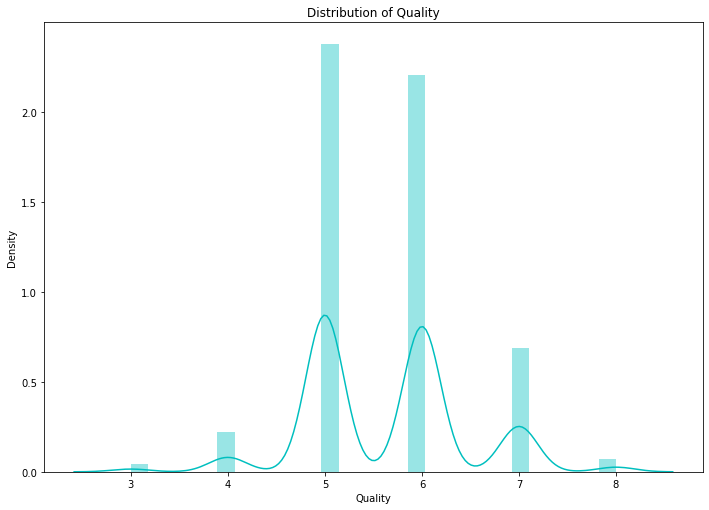

In [10]:
#Distribution of Quality
dims=(11.8,8.27)
fig, ax=plt.subplots(figsize=dims)
Qualityhist=sns.distplot(redwine['quality'],color='c', hist= True, ax=ax)
Qualityhist.set(title ='Distribution of Quality', xlabel='Quality')
FigHist=Qualityhist.get_figure()

From the correlation matrix we can observe that the strongest linear correlation by quality are with volatile acidity and alcohol. Both relationships are low to moderate and whilst alcohol % has a positive linear effect on quality, volatile acidity has a negative effect. Very small association is found with residual sugar, residual sugar and pH. 

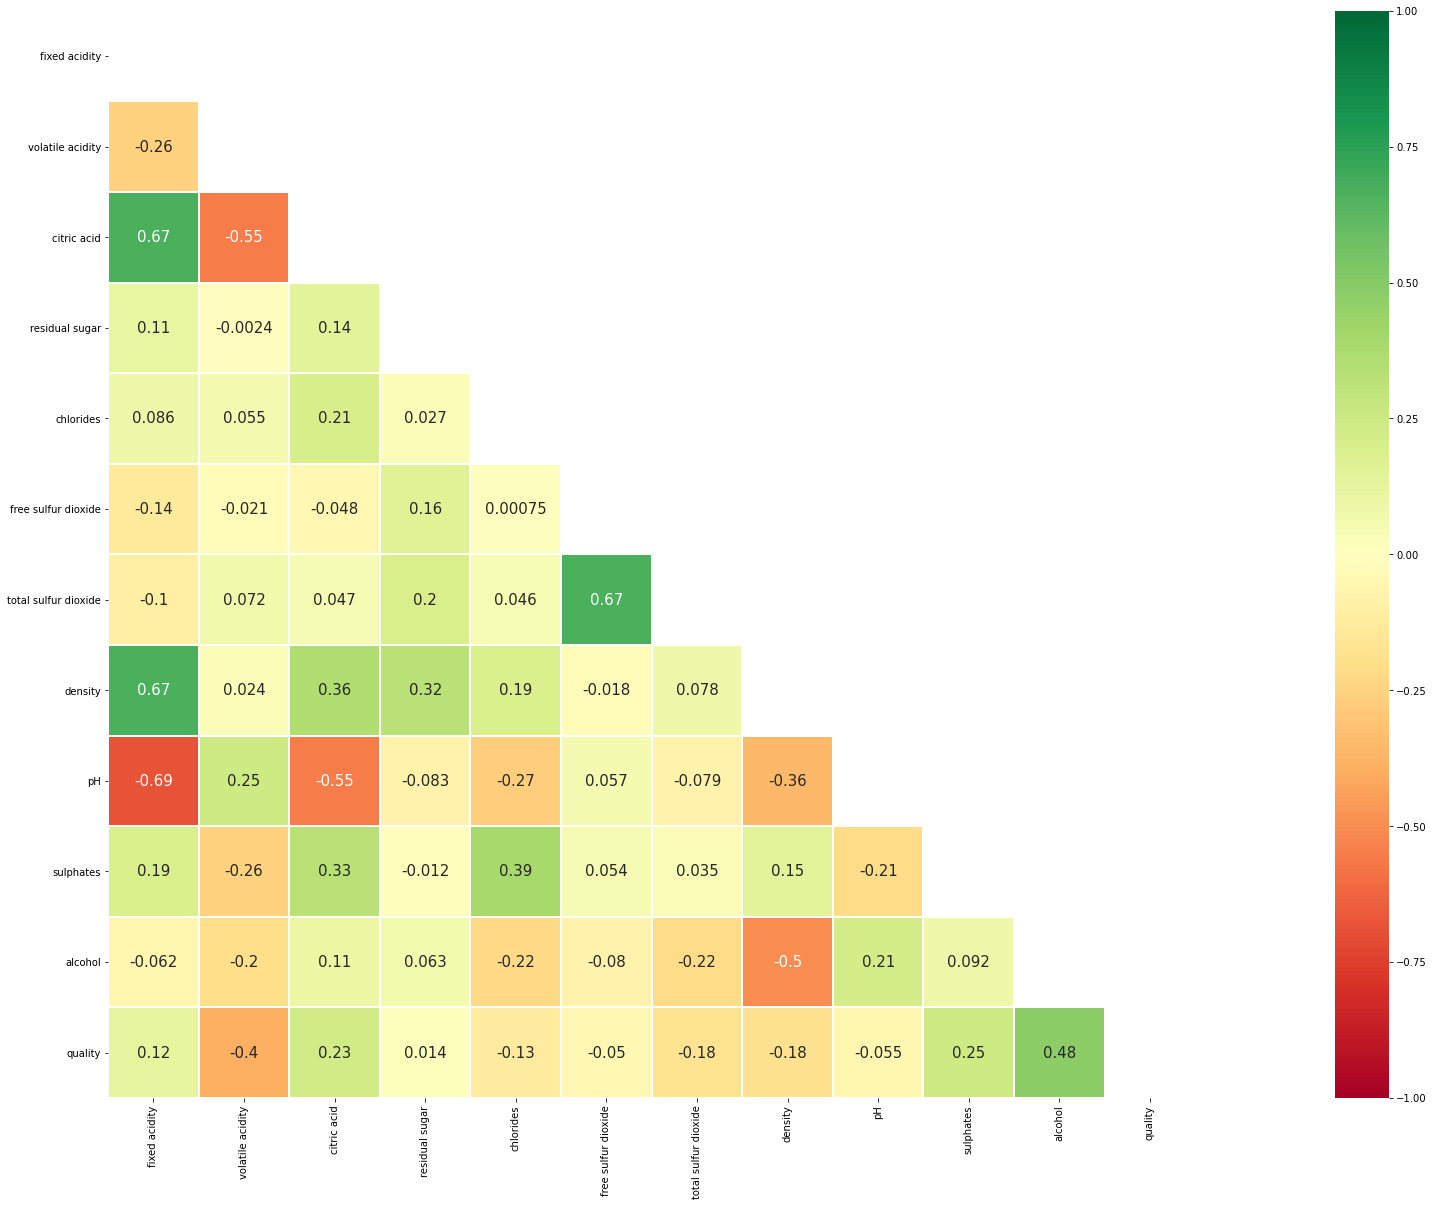

In [11]:
# Correlation Matrix
corr = redwine.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

plt.figure(figsize = (50,20))

sns.heatmap(corr, mask = mask, cmap=plt.cm.RdYlGn, annot=True, fmt = '0.2g', linewidths=1, square=True, vmin=-1, vmax=1, annot_kws={"size":15}) # designed
plt.show()

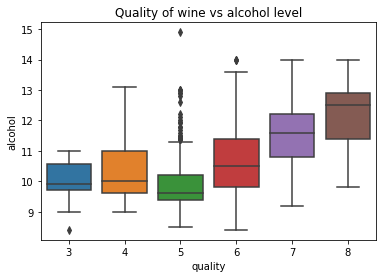

In [12]:
# Boxplots quality wine
sns.boxplot(data=redwine, x='quality', y='alcohol')
plt.title("Quality of wine vs alcohol level");
plt.show()

The boxplots highlights the importance of the alcohol component in red wine. For a low quality wine (5 or below) the level of alcohol is decreasing as the quality is increasing. From a 6 level quality on, instead, the level of alcohol is on average increasing. The jump in alcohol level from 5 to 6 seems to be relevant, marking a difference between "good" and "poor" wine.

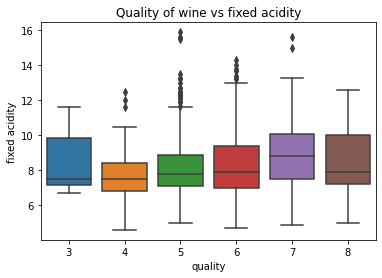

In [13]:
# Quality of wine vs Fixed Acidity
sns.boxplot(data=redwine, x='quality', y='fixed acidity')
plt.title("Quality of wine vs fixed acidity");
plt.show()

The level of tartness will vary depending upon the type of wine, with white wines having the most tartness and red wines not having as much tartness. Thus, it is not surprising that the level of acidity does not have a major impact on the quality of wine. The boxplots overlaps quite a lot, suggesting as well that the level of fixed acidity is not much dependent on the quality of red wine.

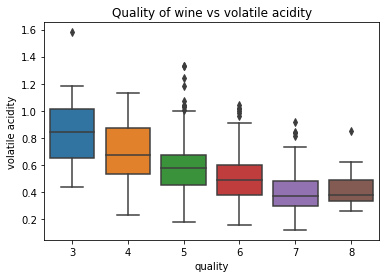

In [14]:
# Quality of wine vs Volatile acidity
sns.boxplot(data=redwine, x='quality', y='volatile acidity')
plt.title("Quality of wine vs volatile acidity");
plt.show()

The volatile acidity measures the amount of acetic acid in wine. When the volatile acidity level is too high, the wine taste may become unpleasant and similar to the one of vinegar. 
The bpxplots suggests exactly this: on average, the better the quality, the lower is the volatile acidity level.

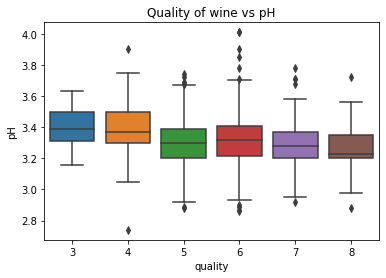

In [15]:
# Quality of wine vs Ph
sns.boxplot(data=redwine, x='quality', y='pH')
plt.title("Quality of wine vs pH");
plt.show()

For red wines it is most desirable to be around 3.3 and 3.6 on the pH scale

<AxesSubplot:xlabel='residual sugar', ylabel='alcohol'>

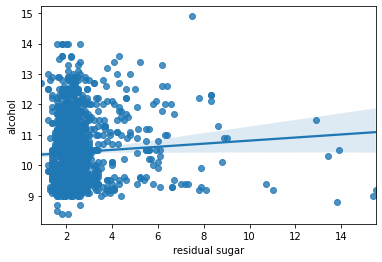

In [16]:
# Regression plot of residual sugar vs alcohol
sns.regplot(x="residual sugar",
            y="alcohol", 
            data=redwine)

The sugar level is the main responsible for the percentage of alcohol in wine. Precisely, higher sugar levels produce higher alcohol. Additionally, warmer growing conditions could cause a higher and more rapid sugar accumulation that could potentially damage the flavour and taste of the wine. Thus, winemakers are left with the choice of a high alcohol or partly unripe grapes. 
It could be possible to reduce the alcohol level with modern techniques and equipment involving osmosis, but this would take away the natural process of wine production, damaging its raputation.

Relevant for the study, is the residual sugars in wine. The residual sugars are those sugars that don't convert into alcohol and carbon dioxide in the process of wine fermentation. Generally speaking, the residual sugar content after fermentation is inversely proportionate to the alcohol level, suggesting that higher alcohol wines have less sugar and lower alcohol wines have more sugar. Differently from the expectations, the residual sugar and the alcohol level do not seem to be inversely proportionate, as the regression line suggests.

**Plot 1: sulfite with quality (around 50mg/l best)**

**Plot 2: densitiy and quality (density increases, quality declines)**

**Plot 3: quality declines when chlorides, salt increases**

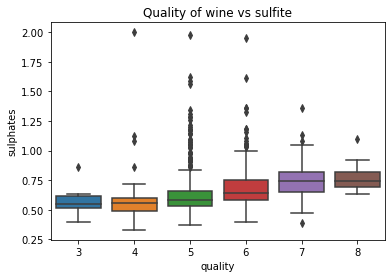

In [17]:
# Quality of wine vs sulphite
sns.boxplot(data=redwine, x='quality', y='sulphates')
plt.title("Quality of wine vs sulfite");
plt.show()

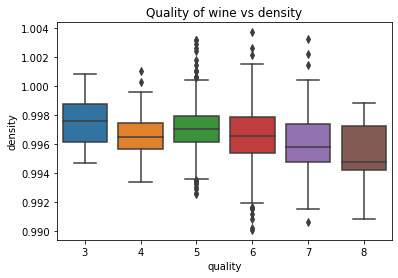

In [18]:
# Quality of wine vs density
sns.boxplot(data=redwine, x='quality', y='density')
plt.title("Quality of wine vs density");
plt.show()

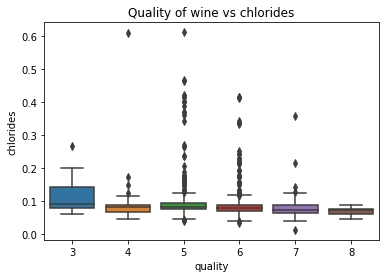

In [19]:
# Quality of wine vs chlorides
sns.boxplot(data=redwine, x='quality', y='chlorides')
plt.title("Quality of wine vs chlorides");
plt.show()

The last plot is the density plot of each variable in our data set. It appears that most variables are normally distributed.

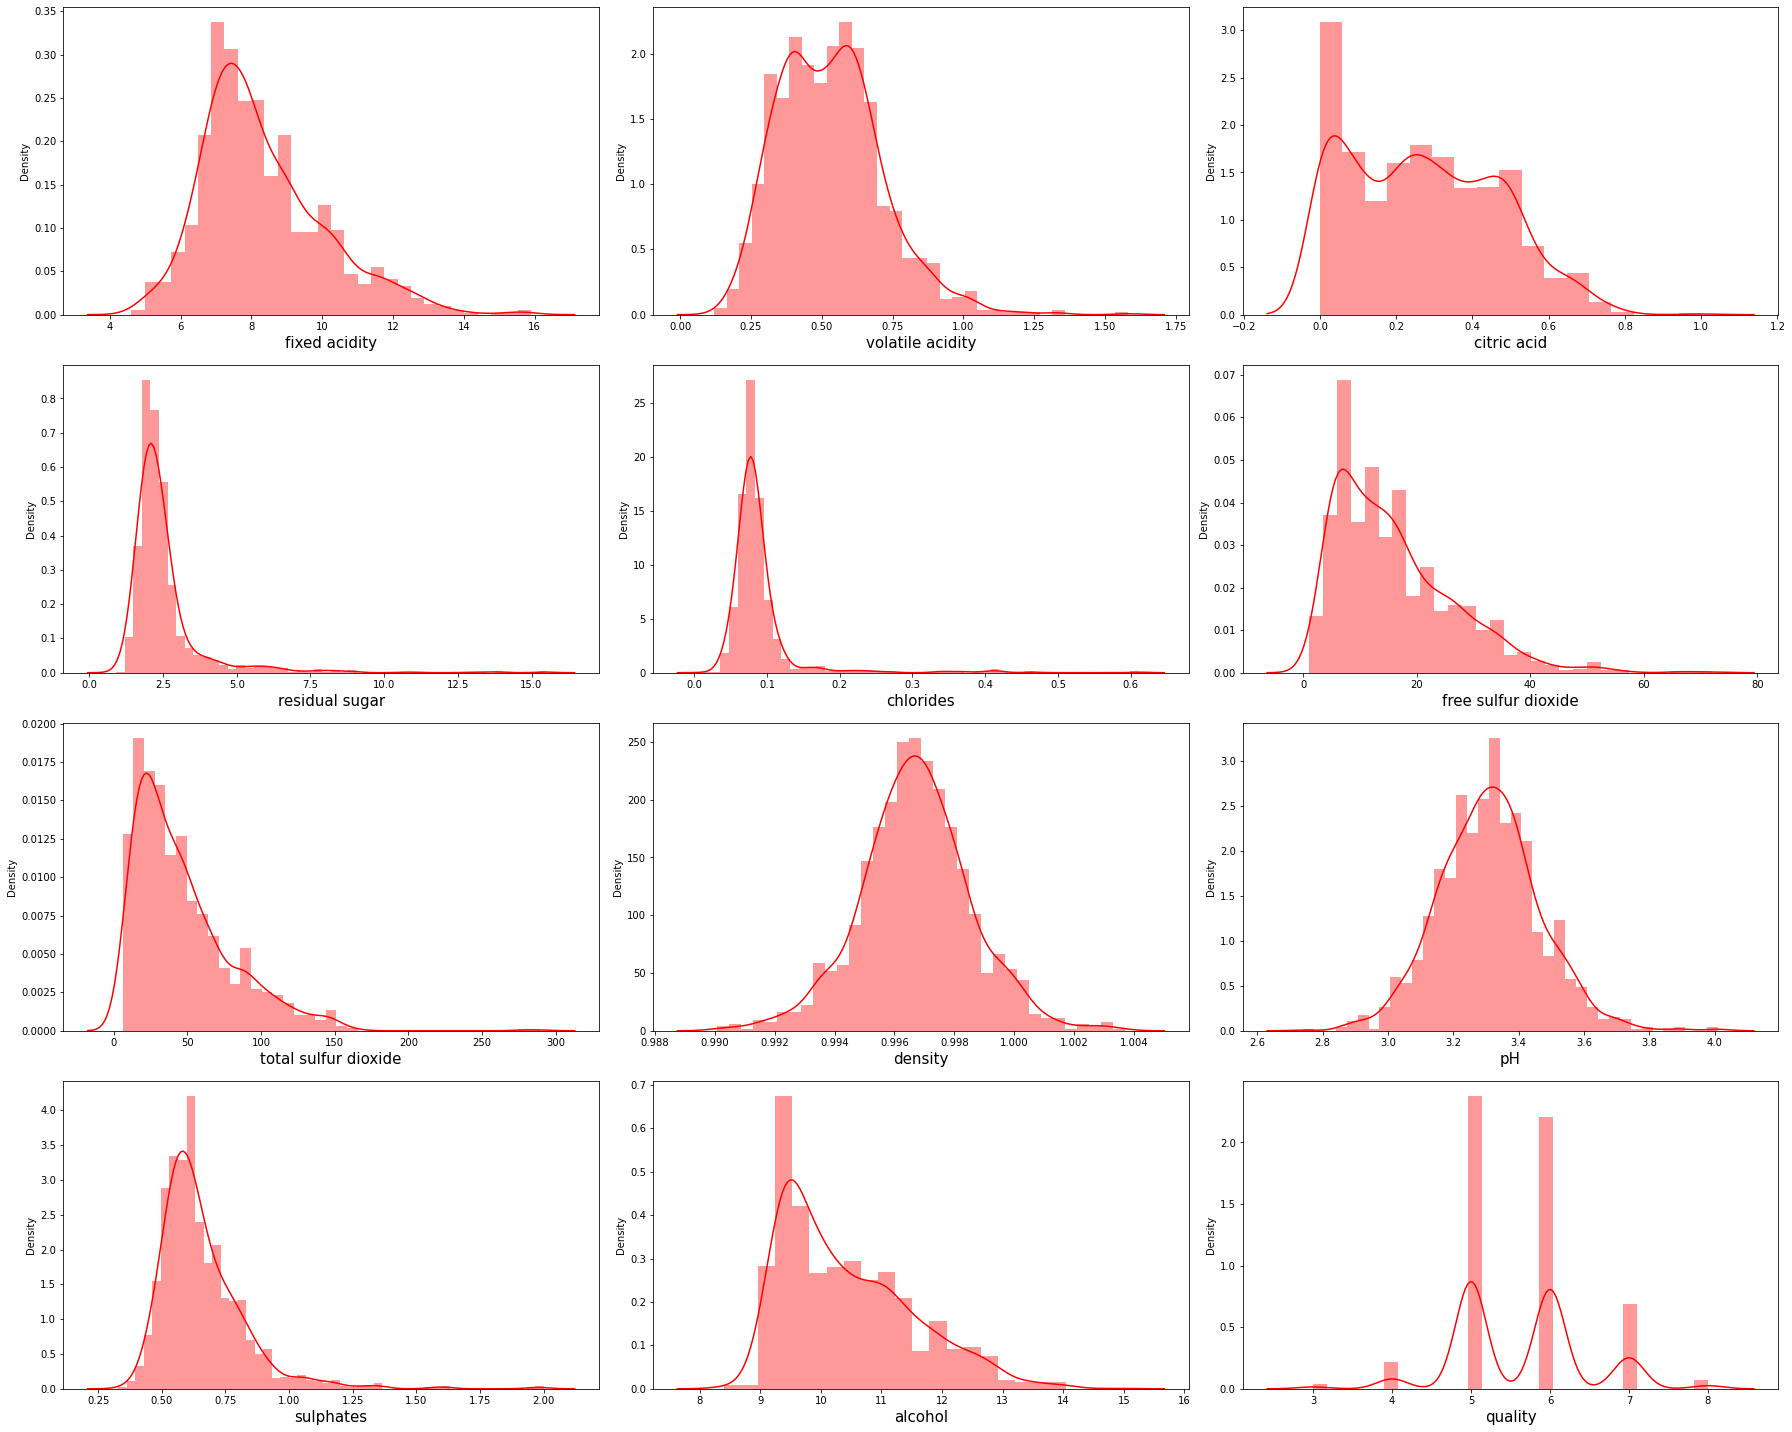

In [20]:
plt.figure(figsize = (25, 20))
plotnumber = 1

for col in redwine:
    if plotnumber <= 12:
        ax = plt.subplot(4, 3, plotnumber)
        sns.distplot(redwine[col], color='red')
        plt.xlabel(col, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

# Regression Method

For the purpose of learning we used both regression and classification methods throughout this project. We first use the variable quality as if it were a continous variable and applied several regression models. These include:

- Linear regression (no hyperparameters)
- Quadratic regression (no hyperparameters)
- Quadratic regression with LASSO (1 hyperparameter)

In [21]:
# Regression packages
from sklearn.preprocessing import StandardScaler, PolynomialFeatures # automatically takes into account standardization
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso

## Preparing the data

The initial step is through preparing the data by splitting into a training and test set. We use quality as our label and all the other variables as our features. 

In [22]:
label = 'quality'
features = [column for column in redwine.columns if column != label]

In [23]:
X = redwine[features]
y = redwine[label]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [24]:
len(X) # Size of the dataset

1359

In [25]:
len(X_train) # Size of the training set

1019

In [26]:
len(X_test) # Size of the test set (In this case 25% of the dataset)

340

## Creating the models

In [27]:
# Linear regression
linreg = make_pipeline(StandardScaler(), LinearRegression() 
)

# Quadratic regression
quadreg = make_pipeline(StandardScaler(), PolynomialFeatures(degree=2), 
LinearRegression() 
)

# Quadratic regression with LASSO
quadlasso_empty = make_pipeline(StandardScaler(), PolynomialFeatures(degree=2), 
Lasso(max_iter=10000)
)

## Hold out method

In [28]:
linreg.fit(X_train, y_train) # fitting linear regression

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [29]:
quadreg.fit(X_train, y_train) # fitting the quadratic regression
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [30]:
quadlasso_empty.get_params() # tells us all the parameters that we have

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('polynomialfeatures', PolynomialFeatures()),
  ('lasso', Lasso(max_iter=10000))],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'polynomialfeatures': PolynomialFeatures(),
 'lasso': Lasso(max_iter=10000),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'polynomialfeatures__degree': 2,
 'polynomialfeatures__include_bias': True,
 'polynomialfeatures__interaction_only': False,
 'polynomialfeatures__order': 'C',
 'lasso__alpha': 1.0,
 'lasso__copy_X': True,
 'lasso__fit_intercept': True,
 'lasso__max_iter': 10000,
 'lasso__normalize': False,
 'lasso__positive': False,
 'lasso__precompute': False,
 'lasso__random_state': None,
 'lasso__selection': 'cyclic',
 'lasso__tol': 0.0001,
 'lasso__warm_start': False}

In [31]:
grid = {'lasso__alpha': np.logspace(-3, 0, 20)}

holdout = ShuffleSplit(test_size=.25, n_splits=1, random_state=0) # validation method holdout

In [32]:
quadlasso = GridSearchCV(estimator = quadlasso_empty, 
param_grid = grid, 
cv = holdout, 
scoring = 'neg_mean_squared_error' # negative to understand which is the best value
)

quadlasso.fit(X_train, y_train) #automatically refits

GridSearchCV(cv=ShuffleSplit(n_splits=1, random_state=0, test_size=0.25, train_size=None),
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('lasso', Lasso(max_iter=10000))]),
             param_grid={'lasso__alpha': array([0.001     , 0.00143845, 0.00206914, 0.00297635, 0.00428133,
       0.00615848, 0.00885867, 0.01274275, 0.01832981, 0.02636651,
       0.0379269 , 0.05455595, 0.078476  , 0.11288379, 0.16237767,
       0.23357215, 0.33598183, 0.48329302, 0.6951928 , 1.        ])},
             scoring='neg_mean_squared_error')

## Model Selection

**Mean Squared Error Method**

We used the mean square error as the criteria to choose the best model. The lowest MSE with the holdout method is given by the linear model. 

In [33]:
mean_squared_error(y_test, linreg.predict(X_test))

0.5245491730657459

In [34]:
mean_squared_error(y_test, quadreg.predict(X_test))

0.5548862345080223

In [35]:
mean_squared_error(y_test, quadlasso.predict(X_test))

0.5371462166877707

### Fitting model on the entire data set

In [36]:
winner =  linreg
winner.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

## K-Fold Cross validation

Additionally k-fold cross validation is applied with k=5. Now the quadratic lasso model provides the lowerst MSE. Therefore, this is chosen as the winner.

In [37]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

def get_mse(model):
  mses = cross_val_score(estimator=model, X=X, y=y, cv=kfold, scoring='neg_mean_squared_error')
  return np.average(-mses)

In [38]:
get_mse(linreg)

0.4404396995102193

In [39]:
get_mse(quadreg)

0.4589389450483464

In [40]:
grid = {'lasso__alpha': np.logspace(-3,0,4)}

quadlasso = GridSearchCV(estimator=quadlasso_empty, 
                         param_grid=grid, 
                         cv=kfold, 
                         scoring='neg_mean_squared_error'
                        )

In [41]:
get_mse(quadlasso)

0.42601516381346477

### Fitting the model on the entire data set

Therefore, the best parameter is calculated. This is suggested as $\alpha$ = 0.01. In production, these cconditions are applied on a newly seen data set.  

In [42]:
quadlasso_empty.get_params() 
quadlasso = GridSearchCV(estimator = quadlasso_empty, 
param_grid = grid, 
cv = LeaveOneOut(), 
scoring = 'neg_mean_squared_error' 
)

quadlasso.fit(X_train, y_train) 
quadlasso_empty.get_params() 

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('polynomialfeatures', PolynomialFeatures()),
  ('lasso', Lasso(max_iter=10000))],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'polynomialfeatures': PolynomialFeatures(),
 'lasso': Lasso(max_iter=10000),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'polynomialfeatures__degree': 2,
 'polynomialfeatures__include_bias': True,
 'polynomialfeatures__interaction_only': False,
 'polynomialfeatures__order': 'C',
 'lasso__alpha': 1.0,
 'lasso__copy_X': True,
 'lasso__fit_intercept': True,
 'lasso__max_iter': 10000,
 'lasso__normalize': False,
 'lasso__positive': False,
 'lasso__precompute': False,
 'lasso__random_state': None,
 'lasso__selection': 'cyclic',
 'lasso__tol': 0.0001,
 'lasso__warm_start': False}

In [43]:
quadlasso.best_params_

{'lasso__alpha': 0.01}

In [44]:
winner = quadlasso.best_estimator_ 

winner.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('polynomialfeatures', PolynomialFeatures()),
                ('lasso', Lasso(alpha=0.01, max_iter=10000))])

## Conclusions Regression Method

For the Regression section, we created three models, Linear regression (no hyperparameters), Quadratic regression (no hyperparameters), and Quadratic regression with LASSO (1 hyperparameter). 

For the model selection we looked at the MSE using the Hold-out method:
* Linear Regression = 0.5245
* Quadratic Regression = 0.5548
* Quadratic Regression with LASSO = 0.5371

The lowest with the test-training split is MSE for the linear model.

Moreover, we cross validated the regression models to find which algorithm works better. Regression models can be validated by looking at the Mean Squared Error (MSE). The less the MSE value the better the model works.

K-Fold --> Performed with k=5, suggest the best model is the one that uses LASSO as regularisation method with hyperparameter 0.01.

From the results above we can decide that Quadratic Regression with LASSO model works better than other models.

# Classification method

The following chapter applies classification modeling to the data throughout various methods. The goal of the analysis is to be able to correctly classify red wine quality depending on their objective physicochemical attributes.

### Preparing the data

Due to the size of the data, we felt comfortable splitting the data randomly into a 25% test set. After training the models on the training set, the quality score was predicted on the test set to avoid adopting noise into the model. Finally the accuracy was evaluated to determine which model would be the most applicable. 

In [45]:
# Loading Packages Classification method
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
import collections
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix

In [46]:
redwine = pd.read_csv('winequality-red.csv', sep=";")
redwine.head()
redwine.quality.size

1599

## Multi-class classification


Considering there are more than two label outcomes, a multi-class classification is required where the classification ranges from y[0,1......10]. Most models only support binary classification requiring transformation of models to support multi-class classifiers. Two examples are the 1-vs1 1-vs-rest method and 1-vs-1. Only feasible if the number of classes are not extreme. 

The method used for validation of the models is the K-fold cross-validation. Whilst accounting for computational time and aiming for low bias, the amount of iteration chosen was 10 as empirically, there is already a high likelihood of accuracy. 

Again, the label is classified as wine quality and the features applied are all of the other variables in our data set.

In [47]:
label = 'quality'
features = [column for column in redwine.columns if column != label]

X = redwine[features]
y = redwine[label]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=206, stratify=y)

## Building the models

In order to optimize the accuracy of our predictions, we used several different models. These include:

- **Multinomial Logistic regression** is an extension of logistic regression that predicts a multinomial probability. For this model, the solver used is the “Lbfgs” which means that it can handle multinomial loss. Besides, the maximum number of iterations taken for the solvers to converge is defined in 1000 and random state 0, meaning that when validating the processing over multiple runs of the code, we will use the same value. Finally, regarding the parameters of the model, we use numpy.logspace, which will return 25 numbers spaced on a log scale that starts on -3 and ends 0.
<br>
<br>
- **1-vs-1 Logistic regression:** consists in adapting logistic regression to multi-class classification problems by creating as many models as class pairs, and each model predicts which class an observation is more likely to belong to. This method allows the binary classifiers to be of any type. However, if there are many classes this will mean huge computational work. In our case, with 10 types the number of classifiers was ${10 \choose 2}$.In this case, we use the same model specifications as in the Multinomial Logistic regression. 
<br>
<br>
- **1-vs-Rest Logistic regression:** is another possibility to adapt binary logistic regression to multi-class classification. In this case, it needs as many models as there are classes, and each model predicts the probability of an observation to belong to a specific class or not. The advantage of this model is that it only needs n classifiers (10 in this occasion) and that the estimators are more precise than the previous case. 
<br>
<br>
- **Decision tree classifier:** is a non-parametric supervised learning method that consists in dividing the inputs into smaller decision rules to create a model that predicts the value of a target variable. The leaves of the tree represent class labels and branches represent conjunctions of features that lead to those class labels. It has many advantages including little preparation of the data and very simple to understand and to interpret. The max_depth parameter specifies the maximum depth of each tree. In this case is defined as follows: [8,16,24,32]
<br>
<br>
- **Random Forest:** approach is like the decision tree but includes some randomness, resulting in a population of individual decision trees that are trained independently to one another and therefore remain uncorrelated (Ho, 2002). Finally, the classification is obtained by doing the average of all the results of the members of the forest.  The random state has been defined as 0 and in the parameters definition. The n_estimators parameter specifies the number of trees in the forest of the model. The value for this parameter is defined in [20, 50, 100, 200, 400] which means that 20/50/100/200/400 different decision trees will be constructed in the random forest. 
<br>
<br>
- **Support vector classifier:** is a generalization of the maximal margin classifier, which allows some points to be misclassified in the training set and stills creates a linear variety. The misclassification permitted is defined with a hyperparameter called “Budget”. In our model, we train SVC with the Radial Basis Function (RBF) kernel, thus two parameters must be considered: C(Budget) and gamma. A low C makes the decision surface smooth, while a high C aims at classifying all training examples correctly. The gamma defines how much influence a single training example has. To make the proper choice we should use the GridSearchCV.

### Hyperparameter tuning

Primarily we use hyperparameter tuning for the Support Vector Classification model. This suggests that the optimal value for C=2.7 (the amount of missclassifications allowed. Moreover, gamma is 1.0. These values are applied in the K-fold cross validation and each model is evaluated on its F1 score, ultimately selecting the best model.

In [48]:
svc = make_pipeline(
  StandardScaler(),
  GridSearchCV(
    estimator=SVC(kernel="rbf"),
    param_grid={
      "C": np.logspace(-3, 3, 15),
      "gamma": np.logspace(-3,3,15)
    },
    cv=kfold,
    scoring = 'f1_micro',
    n_jobs=4
  )
)

svc.fit(X_train, y_train)

svc[1].best_estimator_

SVC(C=2.6826957952797246, gamma=1.0)

In [49]:
models = [
    {
        'name': 'Multinomial Logistic Regression',
        'model': LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter = 1000, random_state=0),
        'params': {
            'C': np.logspace(-3, 0, 25)
        }
    },
    {
        'name': 'OnevsOne LogReg',
        'model': OneVsOneClassifier(LogisticRegression(solver='lbfgs', max_iter=1000, random_state=0)),
        'params': {
        }
    },
    {
        'name': 'OnevsRest LogReg',
        'model': OneVsRestClassifier(LogisticRegression(solver='lbfgs', max_iter=1000, random_state=0)),
        'params': {
        }
    },
    {
        'name' : 'Decision Tree Classifier',
        'model' : DecisionTreeClassifier(random_state=0),
        'params' : {
            'max_depth' : [8,16,24,32]
        }
    },
    {
        'name': 'Random Forest',
        'model': RandomForestClassifier(random_state=0),
        'params': {
            'n_estimators': [20, 50, 100, 200, 400]
        }
    },
    {
        'name': 'SVC',
        'model': SVC(random_state=0,C=2.7, kernel='rbf', degree=3,gamma = 1),
        'params': {
        }
    }
]

In [50]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

for m in models:
    pipeline = make_pipeline(
        StandardScaler(),
        GridSearchCV(
            estimator=m['model'],
            param_grid=m['params'],
            scoring='f1_micro',
            n_jobs=-1,
            cv=kfold
        )
    )
    pipeline.fit(X_train, y_train)
    predictions = pipeline.predict(X_test)
    m['score'] = f1_score(y_test, predictions, average='micro')
    m['pipeline'] = pipeline

### F1 score
After fitting the models on the training data, the F1 scores are compared to define which model should be adopted. The F1 score accounts for both the precision and the recall of the model.  Below is an overview of the F1 scores:

In [51]:
print('The F1 scores of the models are provided found through K-Vold Validation')

for m in models:
    print(f"Model: {m['name']}: score = {m['score']:.3f}")

The F1 scores of the models are provided found through K-Vold Validation
Model: Multinomial Logistic Regression: score = 0.618
Model: OnevsOne LogReg: score = 0.618
Model: OnevsRest LogReg: score = 0.627
Model: Decision Tree Classifier: score = 0.605
Model: Random Forest: score = 0.665
Model: SVC: score = 0.627


The higest F1 score is given by the model: Random forest. Therefore, we further investigate the accuracy of this model. The classification report and confusion matrix are printed. 

              precision    recall  f1-score   support

           3       1.00      0.00      0.00         2
           4       0.00      0.00      0.00        13
           5       0.77      0.81      0.79       170
           6       0.65      0.74      0.69       160
           7       0.66      0.46      0.54        50
           8       0.00      0.00      0.00         5

    accuracy                           0.70       400
   macro avg       0.51      0.33      0.34       400
weighted avg       0.67      0.70      0.68       400



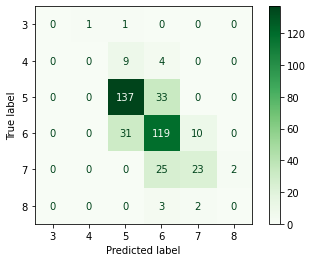

In [52]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)
print(classification_report(y_test, pred_rfc, zero_division=1))
print(plot_confusion_matrix(rfc, X_test, y_test, cmap="Greens"))

The confusion matrix compares the true label with the predicted labels displaying not only the model accuracy but also giving input into the fall out and miss rates. To provide an example, the model classified most as the wines having a quality score of 5 & 6. Moreover, it wasn’t able to predict the wines with the lowest quality score, 3 & 4 well. 

### Fitting the model on the entire data set

After fitting the model on the training set, the next step is to rerun the model on the entire data set. 

In [53]:
winner = RandomForestClassifier(random_state=0, n_estimators=600, min_samples_split=5, min_samples_leaf=4, max_features='auto', max_depth=20, bootstrap=False)
winner.fit(X, y)

RandomForestClassifier(bootstrap=False, max_depth=20, min_samples_leaf=4,
                       min_samples_split=5, n_estimators=600, random_state=0)

## Binary Classification

Throughout the multi-class classification, we can observe again the obstacle of the unbalanced labels. Hereby most wines obtained a quality score of 5 or 6. Moreover, there were no wines that received a score of below 3 or above 8. It suggests that the experts profiling the wines based on blind tasting did not give extreme scores.

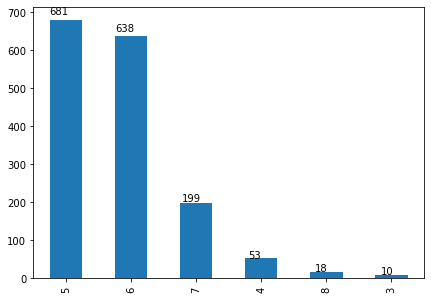

In [54]:
# visualizing skewness
ax = redwine["quality"].value_counts().plot.bar(figsize=(7,5))
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.02, p.get_height() * 1.02))

Subsequently, instead of trying to predict the discrete scoring, we aimed to answer the project question directly: "is there such a thing as a good wine and a bad wine?" Hereby we considered "bad" wines those that received a score below 6.5. Moreover, "good" wines for the purpose of the analysis are considered those above 6.5.

## Threshold quality > 6.5

In [55]:
redwine = pd.read_csv('winequality-red.csv', sep=";")
# Making binary classification for the response variable.
# Dividing wine as good and bad by giving the limit for the quality
bins = (2, 6.5, 8)
class_names = ['bad', 'good']
redwine['quality'] = pd.cut(redwine['quality'], bins = bins, labels = class_names)

In [56]:
label = 'quality'
features = [column for column in redwine.columns if column != label]

X = redwine[features]
y = redwine[label]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=206, stratify=y)

In [57]:
print('Training size: {}, Testing size: {}'.format(X_train.size,X_test.size))

Training size: 13189, Testing size: 4400


In [58]:
label_quality = LabelEncoder()

#Bad becomes 0 and good becomes 1 
redwine['quality'] = label_quality.fit_transform(redwine['quality'])

As can be seen by the graph below, when using the quality > 6.5, the data set is extremely unbalanced. The sample is unbalanced because there are much more bad wines than good wines. Therefore, this is smoothed out by a function called SMOTE. This is using oversampling by making copies of the minority class.

<AxesSubplot:xlabel='quality', ylabel='count'>

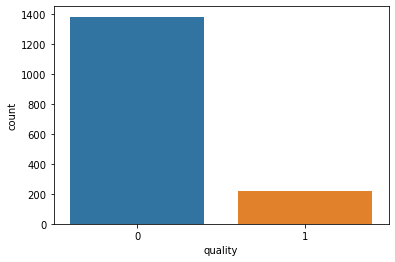

In [59]:
sns.countplot(redwine['quality'])

In [60]:
#!pip install imblearn
sm = SMOTE(random_state=14)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

In [61]:
print("Before smote --> ", collections.Counter(y_train))
print("After smote --> ", collections.Counter(y_train_sm))

Before smote -->  Counter({'bad': 1036, 'good': 163})
After smote -->  Counter({'bad': 1036, 'good': 1036})


In [62]:
scaler = StandardScaler()
X_train_sm = scaler.fit_transform(X_train_sm) 
X_test = scaler.transform(X_test) 

results = []

### Random forest classifier

After transforming the training set by balancing negative and positive value, we analyse the randomforrest model using only the holdout method. 

              precision    recall  f1-score   support

         bad       0.95      0.91      0.93       346
        good       0.57      0.72      0.63        54

    accuracy                           0.89       400
   macro avg       0.76      0.82      0.78       400
weighted avg       0.90      0.89      0.89       400



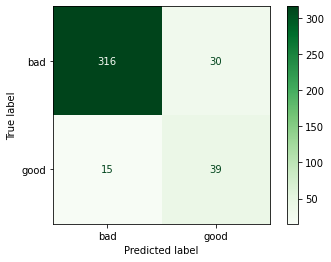

In [63]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train_sm, y_train_sm)
pred_rfc = rfc.predict(X_test)
print(classification_report(y_test, pred_rfc))
print(plot_confusion_matrix(rfc, X_test, y_test, cmap="Greens"))

The confusion matrix when quality > 6.5 for good wines can be seen above. As we can observe, there are 320 true negative, which means that there are 314 predicted bad wines that are also really bad wines. However, there are only 39 True positives which means that 39 outcomes the model has correctly predicted the positive class and 32 False positives. Thus, we can conclude that using this division, we will be able to predict a bad wine very well, but not the good ones. Here we should consider whether it is more costly to make a mistake in a false positive vs false negative to decide if the model is good enough for us. Looking at the accuracy (# times the model is correct / number of predictions) we observe that the weighted avg is 90%

### Parameter tuning

### Support vector classification

Next the support vector classification model is ran without cross validation in order to find the best parameters and kernal state. 

              precision    recall  f1-score   support

         bad       0.96      0.84      0.90       346
        good       0.43      0.80      0.56        54

    accuracy                           0.83       400
   macro avg       0.70      0.82      0.73       400
weighted avg       0.89      0.83      0.85       400



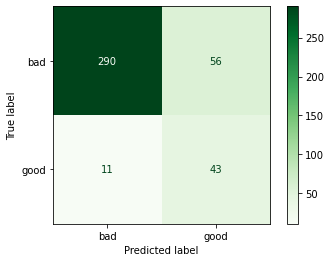

In [64]:
svc = SVC()
svc.fit(X_train_sm, y_train_sm)
pred_svc = svc.predict(X_test)
print(classification_report(y_test, pred_svc))

plot_confusion_matrix(svc, X_test, y_test, cmap= "Greens")  
plt.show()

The result obtained using the Support vector classifier is very similar to the random forest. However, in this case there are more False positive (56 observations) than True positive (43 observations).

In [65]:
svc = make_pipeline(
  StandardScaler(),
  GridSearchCV(
    estimator=SVC(kernel="rbf"),
    param_grid={
      "C": np.logspace(-3, 3, 15),
      "gamma": np.logspace(-3,3,15)
    },
    cv=kfold,
    scoring = 'f1_micro',
    n_jobs=4
  )
)

svc.fit(X_train_sm, y_train_sm)

svc[1].best_estimator_

SVC(C=2.6826957952797246, gamma=1.0)

The parameter tuning found that the optimal value for C is 2.7 and the gamma 1.0. The will be applied to the k-fold cross validation and all models compared on F1 scores. 

## Training the Model with K-Fold Cross Validation

In [66]:
models = [
    {
        'name': 'Multinomial Logistic Regression',
        'model': LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter = 1000, random_state=0),
        'params': {
            'C': np.logspace(-3, 0, 25)
        }
    },
    {
        'name' : 'Decision Tree Classifier',
        'model' : DecisionTreeClassifier(random_state=0),
        'params' : {
            'max_depth' : [8,16,24,32]
        }
    },
    {
        'name': 'Random Forest',
        'model': RandomForestClassifier(random_state=0),
        'params': {
            'n_estimators': [20, 50, 100, 200, 400]
        }
    },
    {
        'name': 'SVC',
        'model': SVC(random_state=0,
                     C=2.7, 
                     kernel='rbf', 
                     degree=3,
                     gamma=1),
        'params': {
        }
    }
]

In [67]:
kfold = KFold(n_splits=10, shuffle=True, random_state=0)

for m in models:
    pipeline = make_pipeline(
        StandardScaler(),
        GridSearchCV(
            estimator=m['model'],
            param_grid=m['params'],
            scoring='f1_micro',
            n_jobs=-1,
            cv=kfold
        )
    )
    pipeline.fit(X_train_sm, y_train_sm)
    predictions = pipeline.predict(X_test)
    m['score'] = f1_score(y_test, predictions, average='micro')
    m['pipeline'] = pipeline

In [68]:
print('The F1 scores of the models are provided found through K-Vold Validation')

for m in models:
    print(f"Model: {m['name']}: score = {m['score']:.3f}")

The F1 scores of the models are provided found through K-Vold Validation
Model: Multinomial Logistic Regression: score = 0.773
Model: Decision Tree Classifier: score = 0.853
Model: Random Forest: score = 0.880
Model: SVC: score = 0.902


In [69]:
models = pd.DataFrame({
    'Model' : ['Multinomial Logistic Regression', 'Decision Tree Classifier', 'Random Forest', 'SVC'],
    'Score' : [0.773, 0.853, 0.880, 0.902]
    })

models.sort_values(by = 'Score', ascending = False)

Model  Score
3                              SVC  0.902
2                    Random Forest  0.880
1         Decision Tree Classifier  0.853
0  Multinomial Logistic Regression  0.773

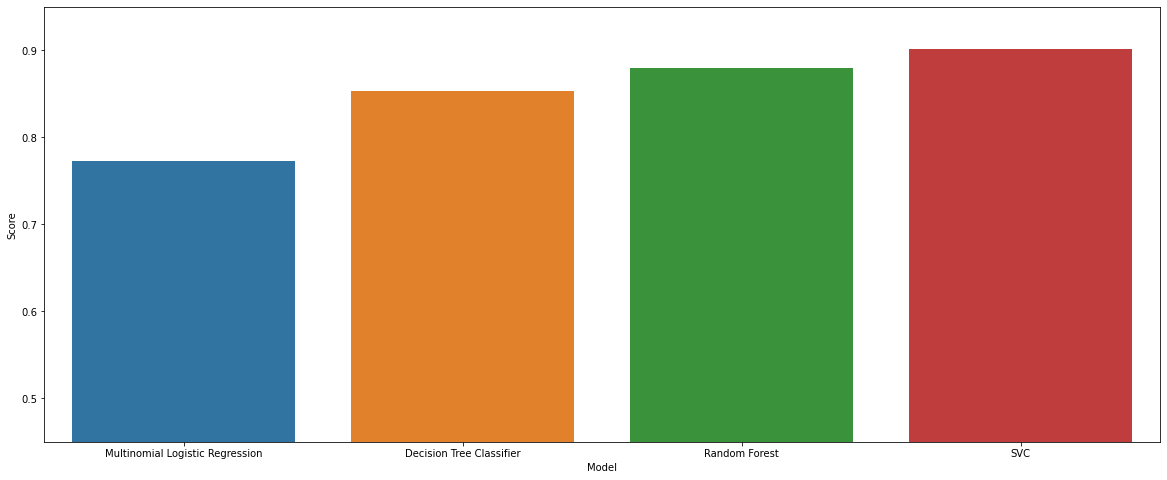

In [70]:
plt.figure(figsize = (20, 8))

sns.barplot(x = 'Model', y = 'Score', data = models)
plt.ylim(0.45, 0.95)
plt.show()

### Classification report

Again we select the model with the highest F1 scores. In this case it is the support vector classification model with an score of 90.3%.

### Winner = SVC

In [71]:
winner = SVC(random_state=0, C=2.7, kernel='rbf', degree=3, gamma=1)
winner.fit(X_train_sm, y_train_sm)
f1_score(y_test, winner.predict(X_test), average='micro')

0.9025

              precision    recall  f1-score   support

         bad       0.96      0.84      0.90       346
        good       0.43      0.80      0.56        54

    accuracy                           0.83       400
   macro avg       0.70      0.82      0.73       400
weighted avg       0.89      0.83      0.85       400



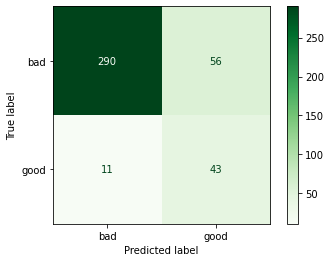

In [72]:
svc = SVC()
svc.fit(X_train_sm, y_train_sm)
pred_svc = svc.predict(X_test)
print(classification_report(y_test, pred_svc))

plot_confusion_matrix(svc, X_test, y_test, cmap= "Greens")  
plt.show()

Nevertheless, again the bad qualities have a nearly perfect precision. However, the model predicted more false positives than true positives. The precision for good qualities is only 43%. Therefore, if our objective is to correctly be able to identify good wines, this isn't giving us the results that we were aiming for. In the table below, the predictions and the true test values are displayed. We can see that most variables are predicted as being bad. 

In [73]:
y_pred=winner.predict(X_test)

A=np.array(y_test)
B=np.array(y_pred)
C=np.array(y_test == y_pred)
dataset = pd.DataFrame({'y_test': A, 'y_pred': B, 'correct' : C}, columns=['y_test', 'y_pred', 'correct'])
dataset

y_test y_pred  correct
0      bad    bad     True
1      bad    bad     True
2      bad    bad     True
3      bad    bad     True
4      bad    bad     True
..     ...    ...      ...
395   good   good     True
396    bad    bad     True
397    bad    bad     True
398    bad    bad     True
399    bad    bad     True

[400 rows x 3 columns]

## Threshold quality > 5.9

Therefore, the same procedure has been carried out as before but now considering that a wine is good if it is 6 or above and bad if it is below 6.

In [74]:
redwine = pd.read_csv('winequality-red.csv', sep=";")
# Making binary classification for the response variable.
# Dividing wine as good and bad by giving the limit for the quality
bins = (2, 5.9, 8)
class_names = ['bad', 'good']
redwine['quality'] = pd.cut(redwine['quality'], bins = bins, labels = class_names)
redwine.size

19188

In [75]:
label = 'quality'
features = [column for column in redwine.columns if column != label]

X = redwine[features]
y = redwine[label]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=206, stratify=y)

In [76]:
print('Training size: {}, Testing size: {}'.format(X_train.size,X_test.size))

Training size: 13189, Testing size: 4400


In [77]:
label_quality = LabelEncoder()

#Bad becomes 0 and good becomes 1 
redwine['quality'] = label_quality.fit_transform(redwine['quality'])

<AxesSubplot:xlabel='quality', ylabel='count'>

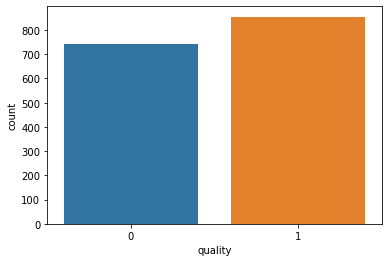

In [78]:
sns.countplot(redwine['quality'])

In [79]:
#!pip install imblearn
sm = SMOTE(random_state=14)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

In [80]:
print("Before smote --> ", collections.Counter(y_train))
print("After smote --> ", collections.Counter(y_train_sm))

Before smote -->  Counter({'good': 641, 'bad': 558})
After smote -->  Counter({'good': 641, 'bad': 641})


In [81]:
scaler = StandardScaler()
X_train_sm = scaler.fit_transform(X_train_sm) 
X_test = scaler.transform(X_test) 

results = []

### Random forest classifier

Again random forest is used the evaluate results of accuracy by using the holdout method. 

              precision    recall  f1-score   support

         bad       0.75      0.81      0.78       186
        good       0.82      0.76      0.79       214

    accuracy                           0.78       400
   macro avg       0.78      0.78      0.78       400
weighted avg       0.79      0.78      0.78       400



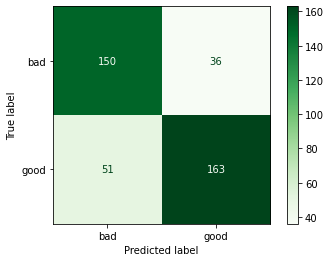

In [82]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train_sm, y_train_sm)
pred_rfc = rfc.predict(X_test)
print(classification_report(y_test, pred_rfc, zero_division=1))
print(plot_confusion_matrix(rfc, X_test, y_test, cmap="Greens"))

Analysing the results again, we see that there are 152 True Negatives and 162 True Positives. Moreover, it only classifies 34 wines as good when they are not and 52 wines as bad when in reality they are good.  So, making this division we are able to classify a good and bad wine. In this case the accuracy is 79%. These results seem worse than the previous ones. However, now both precision and recall for each value is optimized. In this case, 233 observations, which means 120 less correctly classified observations than before. As a contrast, now we are able to predict correcly both types. The difference between these results makes us realise how important it is to define what is a good wine for us and what is not.  

### Parameter tuning

### Support vector classification

Next parameter tuning is applied without cross validation in order to find the best parameters and kernal state. These are then applied to the k-fold cross validation model and the best model chosen. 

In [83]:
svc = make_pipeline(
  StandardScaler(),
  GridSearchCV(
    estimator=SVC(kernel="rbf"),
    param_grid={
      "C": np.logspace(-3, 3, 20),
      "gamma": np.logspace(-3,3,15)
    },
    cv=kfold,
    scoring = 'f1_micro',
    n_jobs=4
  )
)

svc.fit(X_train_sm, y_train_sm)

svc[1].best_estimator_

SVC(C=1.438449888287663, gamma=1.0)

## Training the Model with K-Fold Cross Validation

In [84]:
models = [
    {
        'name': 'Multinomial Logistic Regression',
        'model': LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter = 1000, random_state=0),
        'params': {
            'C': np.logspace(-3, 0, 25)
        }
    },
    {
        'name' : 'Decision Tree Classifier',
        'model' : DecisionTreeClassifier(random_state=0),
        'params' : {
            'max_depth' : [8,16,24,32]
        }
    },
    {
        'name': 'Random Forest',
        'model': RandomForestClassifier(random_state=0),
        'params': {
            'n_estimators': [20, 50, 100, 200, 400]
        }
    },
    {
        'name': 'SVC',
        'model': SVC(random_state=0,
                     C=1.4, 
                     kernel='rbf', 
                     degree=3,
                     gamma=1.0),
        'params': {
        }
    }
]

In [85]:
kfold = KFold(n_splits=10, shuffle=True, random_state=0)

for m in models:
    pipeline = make_pipeline(
        StandardScaler(),
        GridSearchCV(
            estimator=m['model'],
            param_grid=m['params'],
            scoring='f1_micro',
            n_jobs=-1,
            cv=kfold
        )
    )
    pipeline.fit(X_train_sm, y_train_sm)
    predictions = pipeline.predict(X_test)
    m['score'] = f1_score(y_test, predictions, average='micro')
    m['pipeline'] = pipeline

In [86]:
print('The F1 scores of the models are provided found through K-Vold Validation')

for m in models:
    print(f"Model: {m['name']}: score = {m['score']:.3f}")

The F1 scores of the models are provided found through K-Vold Validation
Model: Multinomial Logistic Regression: score = 0.718
Model: Decision Tree Classifier: score = 0.733
Model: Random Forest: score = 0.790
Model: SVC: score = 0.777


In [87]:
models = pd.DataFrame({
    'Model' : ['Multinomial Logistic Regression', 'Decision Tree Classifier', 'Random Forest', 'SVC'],
    'Score' : [0.718, 0.733, 0.790, 0.777]
    })

models.sort_values(by = 'Score', ascending = False)

Model  Score
2                    Random Forest  0.790
3                              SVC  0.777
1         Decision Tree Classifier  0.733
0  Multinomial Logistic Regression  0.718

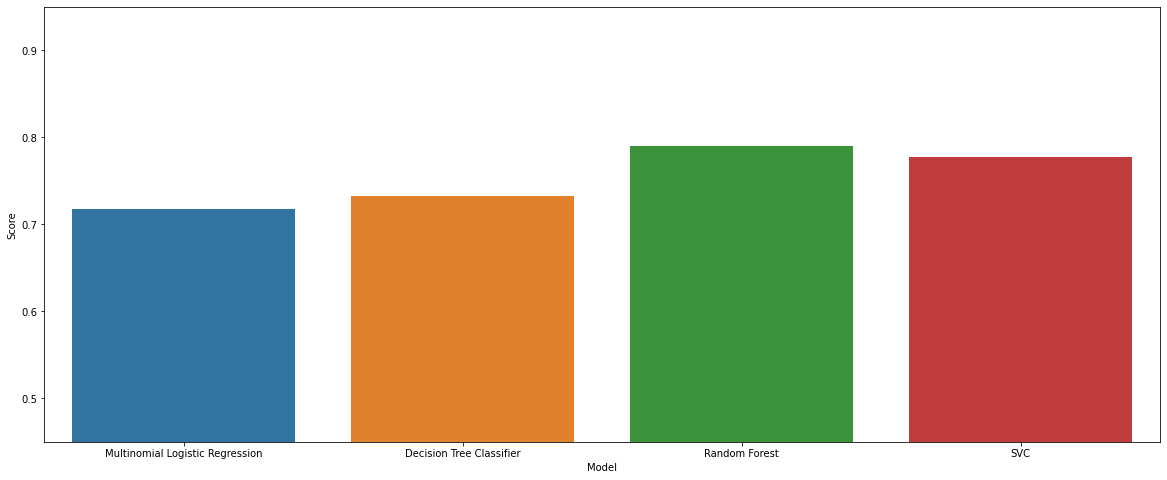

In [88]:
plt.figure(figsize = (20, 8))

sns.barplot(x = 'Model', y = 'Score', data = models)
plt.ylim(0.45, 0.95)
plt.show()

Throughout this method, random forest provides the best F1 Score. Therefore, the model is retrained on the entire data set to prepare for production.

### Winner = Random Forest

In [89]:
#Retrain on the entire data set
winner = RandomForestClassifier(random_state=42, n_estimators=600, min_samples_split=5, min_samples_leaf=4, max_features='auto', max_depth=10, bootstrap=False)
winner.fit(X, y)

RandomForestClassifier(bootstrap=False, max_depth=10, min_samples_leaf=4,
                       min_samples_split=5, n_estimators=600, random_state=42)

The choice of running two different classifications, one for a bad wine treshold of 6 and the other for a bad wine treshold of 6.5 is done to highlight two different scanarios. Then, the F1 score, that simultaneously captures the precision and the recall of the model and thus is a measure of accuracy, and the confusion matrices are compared.  

With a treshold = 6, the F1 score of the model, provided by the random forest, averages 0.79. As the F1 scores ranges between 0 and 1, being 1 the "perfect" model, the accuracy of the model is good. This is due to precision and recall, both varying between 0.74 and 0.75.

With a treshhold = 6.5, instead, the F1 score, provided by the SVC model, largely increases reaching an average value of 0.90. Thus, the accuracy of the model is significantly better than in the case of a treshold of 6. However, the model is much better at predicting bad quality than good quality wine. Indeed, the precision of bad wine equals 0.96, while the one of good wine only reaches 0.43. Instead, the recall is higher in both cases, with good or bad quality. 

Intuitively, as mentioned already, in the case of a 6.5 treshold, the data are much more unbalanced (more bad quality wines) than in the case of a treshold of 6, and we need a model that is good at predicting the minority of good wine. Thus, a treshold of 6 seems more appropriate.

## Conclusion

The conclusion derived from the above analysis is that there is such a thing as a good and a bad wine. There are distinctive differences between bottles of wine depending on its physicochemical characteristics. The main drivers of variance are alcohol percentage and volatile acidity. Based on these objective attributes we can predict wine quality with an accuracy of 69-90%. The scoring is based on rates given by experts in a blind trial. Therefore, this would additionally mean that the experts are able to predict substantially well the quality of red wine. 

When treating the scoring as discrete variables and performing a multi-class classification model, we found that the random forest method is the best. Throughout the regression approach, we found that the quadratic lasso model performed the best. Trading bias-variance and using the knowledge obtained throughout the course, we feel that the binary classification model wiht theshold 6 is the most appropriate model, obtaining an F1 accuracy score of 79%.

As an outlook for future research, we would consider using a second data set associated with white wine to find similarities and differences in the discovery of variables that present importance for the quality of a wine. It could be the case that variables that are considered for separating a good from a bad red wine, do not have any influence or effect on the quality prediction of white wine. 

# References

Admin. (2021, February 21). How Acidity Plays an Important Role in Wine Quality. Grapeworks - Tanium Machinery. Retrieved June 8, 2021, from https://grapeworks.com.au/news/winemaking/how-acidity-plays-an-important-role-in-wine-quality/

D. (2017, October 29). Red and White Wine Quality. Kaggle. Retrieved June 9, 2021, from https://www.kaggle.com/danielpanizzo/red-and-white-wine-quality

Is Wine Acidic? Wine Acid Answers and Low Acid Wines. (n.d.). Binwise. Retrieved June 8, 2021, from https://home.binwise.com/blog/is-wine-acidic

A Detailed Explanation of Acids Used in Wine Making. (n.d.). HomeBrewIt.Com. Retrieved June 8, 2021, from https://www.homebrewit.com/pages/a-detailed-explanation-of-acids-used-in-wine-making

Total Sulfur Dioxide - Why it Matters, Too! (n.d.). Midwest Grape and Wine Industry Institute. Retrieved June 8, 2021, from https://www.extension.iastate.edu/wine/total-sulfur-dioxide-why-it-matters-too

Wine acidity and crispness. (n.d.). Total Wine and More. Retrieved June 8, 2021, from https://www.totalwine.com/wine-guide/wine-acidity-crispness

Volatile Acidity. (2019, March 18). Waterhouse Lab. Retrieved June 8, 2021, from https://waterhouse.ucdavis.edu/whats-in-wine/volatile-acidity

Frazier, K. (n.d.). Interesting Facts About Sugar Content in Wine. LoveToKnow. Retrieved June 8, 2021, from https://wine.lovetoknow.com/wiki/Sugar_Content_in_Wine

Measuring Residual Sugar. (2018, August 6). WineMakerMag.Com. https://winemakermag.com/technique/501-measuring-residual-sugar-techniques

Alcohol content in red wines. (n.d.). Wine Companion. Retrieved June 9, 2021, from https://www.winecompanion.com.au/resources/wine-tasting/alcohol-content-in-red-wines

Bjarnadottir, M. A. S. (2017, June 4). Red Wine: Good or Bad? Healthline. https://www.healthline.com/nutrition/red-wine-good-or-bad#TOC_TITLE_HDR_3

Jennings, M. K. S. (2017, February 17). Red Wine vs White Wine: Which Is Healthier? Healthline. https://www.healthline.com/nutrition/red-vs-white-wine

Ho, T. K. (2002). A data complexity analysis of comparative advantages of decision forest constructors. Pattern Analysis & Applications, 5(2), 102-112.